In [80]:
from matplotlib import pyplot as plt
from IPython.display import HTML
import numpy as np
from scipy import linalg

In [81]:
A = np.array([[1/np.sqrt(2), 1], [1/np.sqrt(2), 0]]) @ np.diag([-3,4]) @ np.array([[1/np.sqrt(2), 1], [1/np.sqrt(2), 0]]).T

In [85]:
A = np.array([[0, 1], [-2, -1]])
X,Y = np.meshgrid(np.arange(-10, 11, 1), np.arange(-10, 11, 1))
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

In [86]:
eigenvalues, eigenvectors = linalg.eig(A)

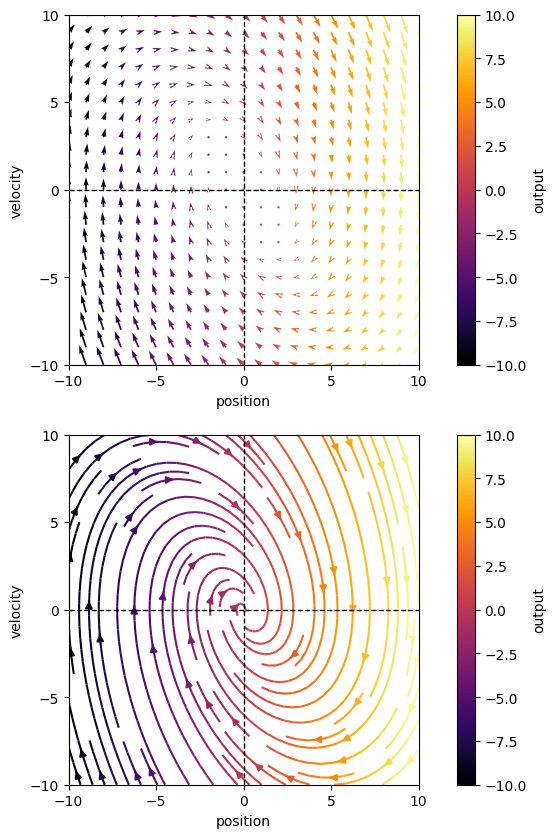

In [87]:
fig, axs = plt.subplots(2, figsize=(10, 10))
C = X
q = axs[0].quiver(X, Y, U, V, C, cmap='inferno', width=0.005, minshaft=0.5, minlength=1.5)
axs[1].streamplot(X, Y, U, V, cmap='inferno', color=C)
for ax in axs:
    cbar = fig.colorbar(q, ax=ax)
    cbar.set_label('output')
    ax.hlines(0, -10, 10, color='k', linestyles='--', linewidth=1)
    ax.vlines(0, -10, 10, color='k', linestyles='--', linewidth=1)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-10, 11, 5))
    ax.set_yticks(np.arange(-10, 11, 5))
    ax.set_xlabel('position')
    ax.set_ylabel('velocity')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
if np.all(np.isreal(eigenvalues)):
    for eig_val, eig_vec in zip(eigenvalues, eigenvectors.T):
        ax.quiver(0, 0, eig_vec[0]*np.abs(eig_val), eig_vec[1]*np.abs(eig_val), angles='xy', scale_units='xy', scale=1, color='r', linewidth=2)
plt.show()
fig.savefig('phase_portrait_2.png', dpi=300)

C:\Users\thdub\AppData\Local\Temp\ipykernel_24328\1743443088.py:1: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  u_interp = interp2d(X[0], Y[:, 0], U)
C:\Users\thdub\AppData\Local\Temp\ipykernel_24328\1743443088.py:2: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For sca

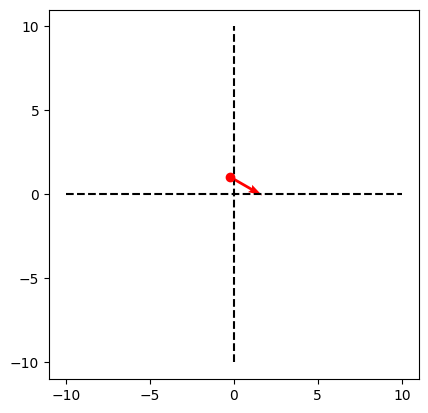

In [31]:
u_interp = interp2d(X[0], Y[:, 0], U)
v_interp = interp2d(X[0], Y[:, 0], V)

def update_point(num, point, vector, X, Y, U, V):
    """
    update point position """   

    # Calculate the direction of the vector at the current point
    direction = np.array([u_interp(point.get_xdata(), point.get_ydata()), v_interp(point.get_xdata(), point.get_ydata())])

    # Normalize the direction
    direction /= np.linalg.norm(direction)

    t = 0.5
    # Update the position of the point
    point.set_xdata(point.get_xdata() + t*direction[0])
    point.set_ydata(point.get_ydata() + t*direction[1])

    new_direction = np.array([u_interp(point.get_xdata(), point.get_ydata()), v_interp(point.get_xdata(), point.get_ydata())])
    new_direction /= np.linalg.norm(new_direction)

    # Update the position and direction of the vector
    vector.set_UVC(new_direction[0], new_direction[1])
    vector.set_offsets([point.get_xdata()[0], point.get_ydata()[0]])

    return point, vector,

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
# q = ax.quiver(X, Y, U, V, width=0.005)
# ax.streamplot(X, Y, U, V, color='k')

ax.set_aspect('equal')
ax.hlines(0, -10, 10, color='k', linestyles='--')
ax.vlines(0, -10, 10, color='k', linestyles='--')
ax.set_xticks(np.arange(-10, 11, 5))
ax.set_yticks(np.arange(-10, 11, 5))

# Create a point
point, = ax.plot([7], [1], 'ro')
vector = ax.quiver([7], [1], [0], [0], color='r', scale=10)

# Create animation
ani = FuncAnimation(fig, update_point, frames=60, fargs=(point, vector, X, Y, U, V))

html_ani = HTML(ani.to_jshtml())
with open('html_ani.html', 'w') as f:
    f.write(html_ani.data)